### Lista 1 - Extragaláctica

Andressa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath
from astropy.table import Table
from scipy.optimize import curve_fit

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15

Exercício 4b

In [35]:
#dados do exercício
ra_ngp = np.deg2rad(192.8595)
dec_ngp = b_ncp = np.deg2rad(27.12825)
l_ncp = np.deg2rad(123.932)

dec = np.deg2rad(-54.7152777)
ra = np.deg2rad(141.3458333)

In [36]:
#primeira equação de transformação de equatoriais para galácticas
sen_b = np.sin(dec_ngp)*np.sin(dec) + np.cos(dec_ngp)*np.cos(dec)*np.cos(ra-ra_ngp)
b = np.arcsin(sen_b)
b_degree = np.rad2deg(b)
print(b, b_degree)

-0.05230533725139285 -2.9968750705132163


In [37]:
#segunda equação de transformação de equatoriais para galácticas
sen = (np.cos(dec)*np.sin(ra-ra_ngp))/np.cos(b)
print(sen) #angulo em rad

-0.45277073754012465


In [38]:
#terceira equação de transformação de equatoriais para galácticas
cos = (np.cos(dec_ngp)*np.sin(dec)-np.sin(dec_ngp)*np.cos(dec)*np.cos(ra-ra_ngp))/np.cos(b)
print(cos) #angulo em rad

-0.8916269731380785


In [39]:
tg = (sen/cos)
print(tg)

0.5078028718070287


In [40]:
tg_l_ncp = np.tan(l_ncp)
print(tg_l_ncp)

-1.4863631077152164


In [41]:
l = np.arctan(-8.4154)
l_degree = np.rad2deg(l)
print(l, l_degree)

-1.4525211833327438 -83.22333345831431


In [42]:
cos_l = np.cos(l)
print(cos_l)

0.11799957759201363


In [43]:
#lei dos cossenos
d = 9
d_proj = 9 * np.cos(b)
R_0 = 8
R = np.sqrt(d_proj**2 + R_0**2 - 2*d_proj*R_0*cos_l)
print(R) #kpc

11.305303955088183


Exercício 5a

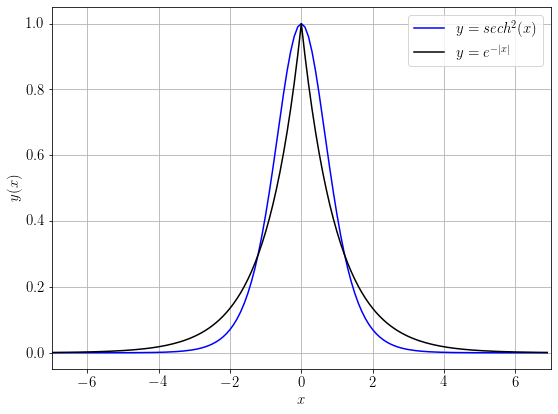

In [44]:
x1 = -7
x2 = 7
x = np.arange(x1, x2, 0.1)

sech = 1/np.cosh(x)

plt.figure(figsize=[8,6])
plt.plot(x, sech**2, 'b-', label='$y = sech^2(x)$')
plt.plot(x, np.exp(-abs(x)), 'k-', label='$y=e^{-|x|}$')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y(x)$', fontsize=15)
plt.xlim(x1, x2)
plt.legend()
plt.grid()
#plt.title('Solução exemplo', fontsize=15)
plt.tight_layout()
plt.savefig('5a')

Exercício 5c

In [45]:
Md = 5e10 #Msun
R0 = 3.5*1000 #pc
z0 = 0.5*1000 #pc
R = 8*1000 #pc
z = 30 #pc

sech = 1/np.cosh(z/z0)

rho = (Md/(4*np.pi*z0*R0**2))*np.exp(-R/R0)*(sech)**2
print(rho)

0.06582917658670955


Exercício 6b

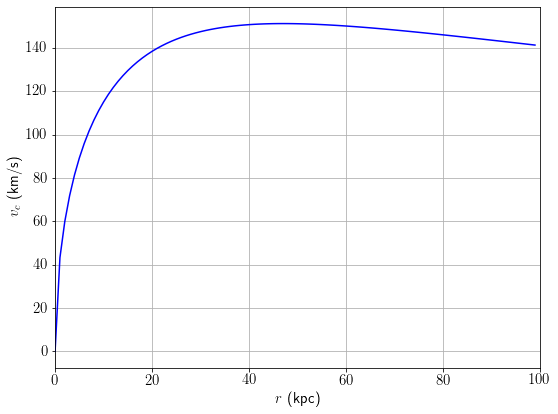

In [46]:
r1 = 0
r2 = 100
r = np.arange(r1, r2, 1)

G = 43007.1 #kpc (km/s)² (1e10 Msun)⁻¹
M_h = 100 #1e10 Msun
a = 47 #kpc

v_c = np.sqrt(G*M_h*(r/(r+a)**2))

plt.figure(figsize=[8,6])
plt.plot(r, v_c, 'b-')
plt.xlabel('$r$ (kpc)', fontsize=15)
plt.ylabel('$v_c$ (km/s)', fontsize=15)
plt.xlim(r1, r2)
#plt.legend()
plt.grid()
#plt.title('Solução exemplo', fontsize=15)
plt.tight_layout()
plt.savefig('6c')

Exercício 7e

In [47]:
G = 6.672e-11 #m³ kg⁻¹ s⁻²
M = 1.55e6 * 1.989e30 #kg
c = 3e8 #m/s

r_s = (2*G*M)/(c**2) #m
r_s = r_s/1.496e11 #UA
print(r_s)

0.03055472727272727


Exercício 8

In [2]:
teste = Table.read('data', format='fits')
print(teste.colnames)

['ra', 'dec', 'parallax', 'l', 'b', 'pmra', 'pmdec']


Unidades:

ra [deg], dec [deg], parallax [mas], l [deg], b [deg], pmra [mas/yr], pmdec [mas/yr]

i

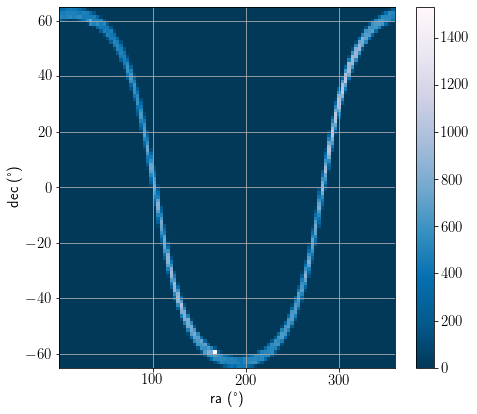

In [48]:
plt.figure(figsize=[7,6])
ra = np.array(teste['ra'])
dec = np.array(teste['dec'])
plt.hist2d(ra, dec, bins=100, weights=None, cmin=None, cmax=None, cmap='PuBu_r')
cbar = plt.colorbar()

#plt.title('', fontsize=12)
plt.xlabel('ra (°)')
plt.ylabel('dec (°)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

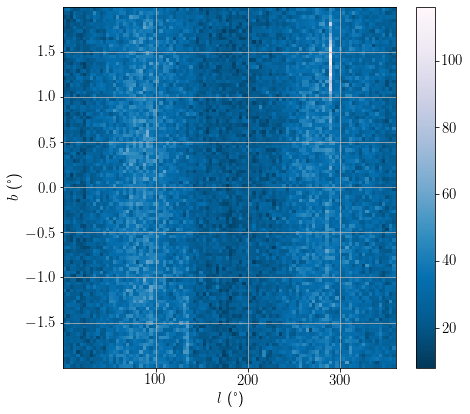

In [49]:
plt.figure(figsize=[7,6])
l = np.array(teste['l'])
b = np.array(teste['b'])
plt.hist2d(l, b, bins=100, weights=None, cmin=None, cmax=None, cmap='PuBu_r')
cbar = plt.colorbar()

#plt.title('', fontsize=12)
plt.xlabel('$l$ (°)')
plt.ylabel('$b$ (°)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

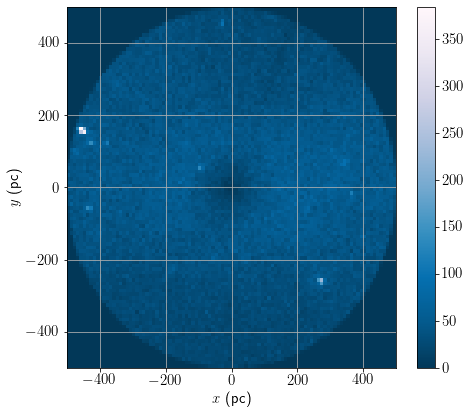

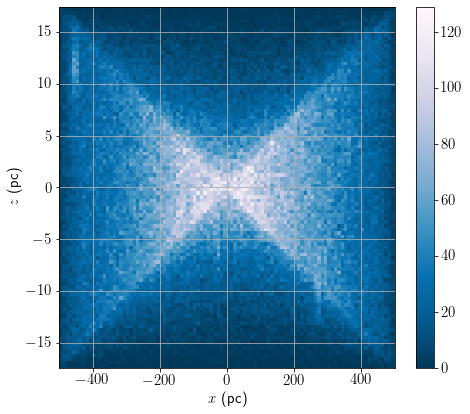

In [50]:
b = np.deg2rad(np.array(teste['b']))
l = np.deg2rad(np.array(teste['l']))
d = (1000/teste['parallax']) #pc

x = d * np.cos(b) * np.sin(l)
y = d * np.cos(b) * np.cos(l)
z = d * np.sin(b)

plt.figure(figsize=[7,6])
plt.hist2d(x, y, bins=100, weights=None, cmin=None, cmax=None, cmap='PuBu_r')
cbar = plt.colorbar()

#plt.title('', fontsize=12)
plt.xlabel('$x$ (pc)')
plt.ylabel('$y$ (pc)')
plt.grid(True)
#plt.legend()
plt.tight_layout()


plt.figure(figsize=[7,6])
plt.hist2d(x, z, bins=100, weights=None, cmin=None, cmax=None, cmap='PuBu_r')
cbar = plt.colorbar()

#plt.title('', fontsize=12)
plt.xlabel('$x$ (pc)')
plt.ylabel('$z$ (pc)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

ii

In [3]:
alpha_deg = np.array(teste['ra']) #deg
alpha_rad = np.radians(np.array(teste['ra'])) #rad

delta_deg = np.array(teste['dec']) #deg
delta_rad = np.radians(np.array(teste['dec'])) #rad

b_deg = np.array(teste['b']) #deg
b_rad = np.radians(np.array(teste['b'])) #rad

l_deg = np.array(teste['l']) #deg
l_rad = np.radians(np.array(teste['l'])) #rad

mi_alpha = np.array(teste['pmra']) #mas/yr

mi_delta = np.array(teste['pmdec']) #mas/yr

parallax = np.array(teste['parallax']) #mas

In [4]:
alpha_ngp = np.radians(192.8595)
delta_ngp = np.radians(27.12825)

In [5]:
C1 = (np.sin(delta_ngp)*np.cos(delta_rad))-(np.cos(delta_ngp)*np.sin(delta_rad)*np.cos(alpha_rad-alpha_ngp))
C2 = (np.cos(delta_ngp)*np.sin(alpha_rad-alpha_ngp))

In [6]:
cos_b = np.sqrt(C1**2+C2**2)

In [7]:
mi_l_est = (1/cos_b)*(C1*mi_alpha+C2*mi_delta)
mi_b = (1/cos_b)*(-C2*mi_alpha+C1*mi_delta)

In [8]:
mi_l = mi_l_est/cos_b #mas/yr

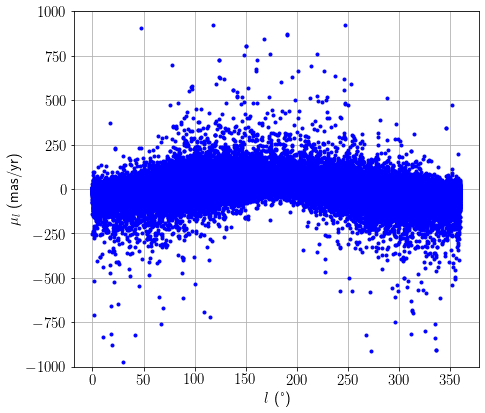

In [9]:
plt.figure(figsize=[7,6])
plt.plot(l_deg, mi_l, 'b.')

#plt.title('', fontsize=12)
plt.xlabel('$l$ (°)')
plt.ylabel('$\mu_l$ (mas/yr)')
plt.ylim(-1000, 1000)
plt.grid(True)
#plt.legend()
plt.tight_layout()

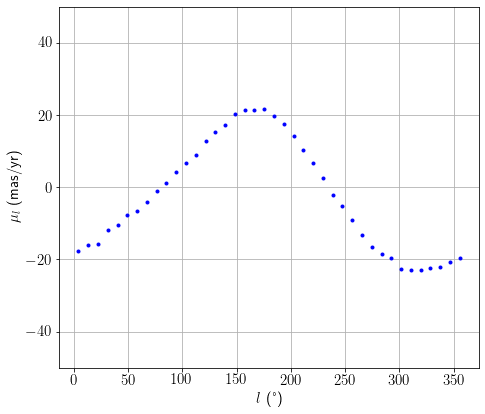

In [10]:
#versão com binagem
lmin = 0.0
lmax = 360.0
nbins = 40
dl = (lmax-lmin)/nbins

media_mi_l = np.empty(nbins)
ls = np.empty(nbins)

for i in range(0, nbins):
    l1 = i * dl
    l2 = l1 + dl
    ls[i] = (0.5 * (l1+l2))

    cond2 = np.argwhere((l_deg>l1) & (l_deg<l2)).flatten()
    media_mi_l[i] = np.mean(mi_l[cond2])
    
plt.figure(figsize=[7,6])
plt.plot(ls, media_mi_l, 'b.')
plt.ylim(-50, 50)
plt.xlabel('$l$ (°)')
plt.ylabel('$\mu_l$ (mas/yr)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

iii

In [11]:
d = np.array(1000/teste['parallax']) #pc

In [12]:
cond_100 = (d<100)
dist = d[cond_100] 
mi_l_new = mi_l[cond_100]
l_new = l_deg[cond_100]

In [13]:
#1 mas = 4.84814e-9 rad
# 1 yr = 3.154e7 s
# 1 pc = 3.086e13 km
conversao = (4.84814e-9/3.154e7) * 3.086e13

In [14]:
v_t = mi_l_new*dist * conversao

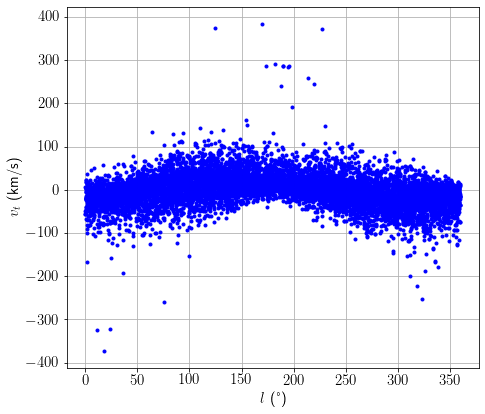

In [15]:
plt.figure(figsize=[7,6])
plt.plot(l_new, v_t, 'b.')

#plt.title('', fontsize=12)
plt.xlabel('$l$ (°)')
plt.ylabel('$v_t$ (km/s)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

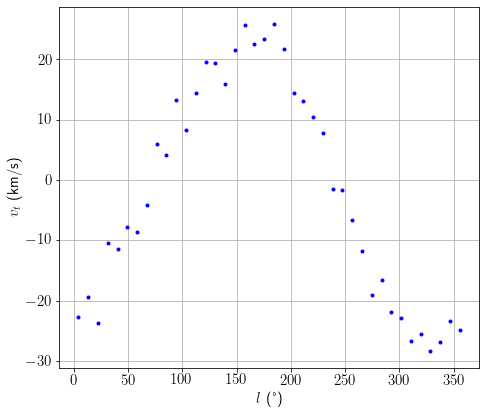

In [16]:
#versão com binagem
lmin = 0.0
lmax = 360.0
nbins = 40
dl = (lmax-lmin)/nbins

media_vt = np.empty(nbins)
ls = np.empty(nbins)

for i in range(0, nbins):
    l1 = i * dl
    l2 = l1 + dl
    ls[i] = (0.5 * (l1+l2))

    cond2 = np.argwhere((l_new>l1) & (l_new<l2)).flatten()
    media_vt[i] = np.mean(v_t[cond2])
    
plt.figure(figsize=[7,6])
plt.plot(ls, media_vt, 'b.')
plt.xlabel('$l$ (°)')
plt.ylabel('$v_t$ (km/s)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

In [17]:
ls_rad =  np.radians(ls)

In [18]:
def curva(ls_rad, u0, v0):
    return (-1)*(u0*np.sin(ls_rad) + v0*np.cos(ls_rad))

param, param_cov = curve_fit(curva, ls_rad, media_vt)
  
print(f'coeficientes: {param}')
print(f'erro: {param_cov}')

u0 = param[0]
v0 = param[1]

fit = (-1)*(u0*np.sin(ls_rad) + v0*np.cos(ls_rad))

coeficientes: [-10.1235653   23.03705243]
erro: [[6.05854919e-01 2.08112587e-09]
 [2.08112587e-09 6.05854929e-01]]


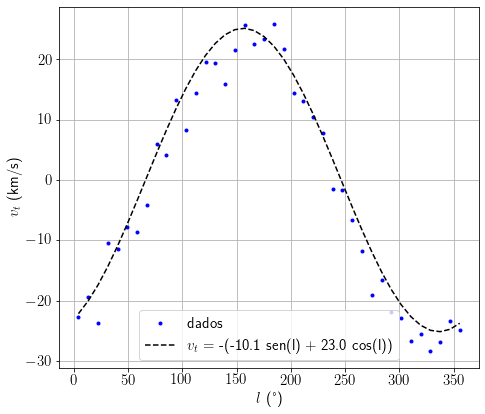

In [19]:
plt.figure(figsize=[7,6])
plt.plot(ls, media_vt, '.', color ='blue', label='dados')
plt.plot(ls, fit, '--', color ='black', label =f'$v_t$ = -({round(u0,1)} sen(l) + {round(v0,1)} cos(l))')
#plt.ylim(-70, 70)
plt.xlabel('$l$ (°)')
plt.ylabel('$v_t$ (km/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [20]:
u0 #km/s
v0 #km/s

23.037052432213173

In [21]:
d_kpc = d/1000 #kpc
corr = (1/d_kpc) * (u0*np.sin(l_rad) + v0*np.cos(l_rad)) #km/s/kpc
mi_l_ = mi_l * 4.74047 #km/s/kpc
mi_l_corr = mi_l_ + corr #km/s/kpc

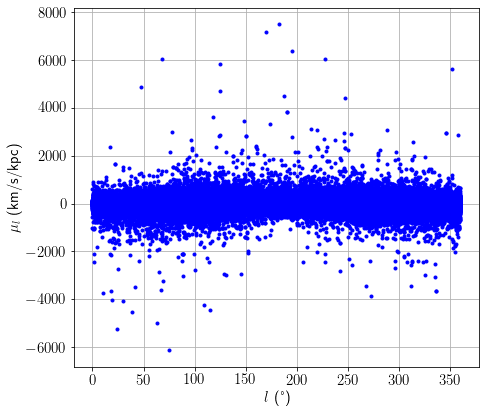

In [22]:
plt.figure(figsize=[7,6])
plt.plot(l_deg, mi_l_corr, 'b.')

#plt.title('', fontsize=12)
plt.xlabel('$l$ (°)')
plt.ylabel('$\mu_l$ (km/s/kpc)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

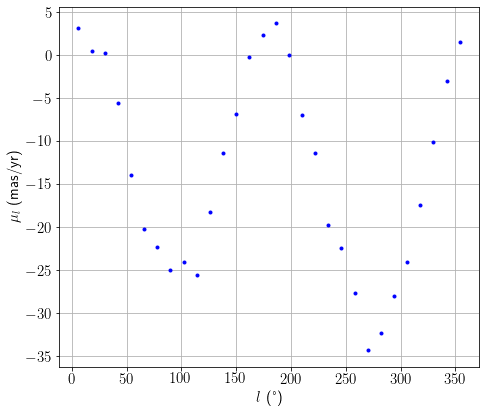

In [33]:
#versão com binagem
lmin = 0.0
lmax = 360.0
nbins = 30
dl = (lmax-lmin)/nbins

media_mi_corr = np.empty(nbins)
ls = np.empty(nbins)

for i in range(0, nbins):
    l1 = i * dl
    l2 = l1 + dl
    ls[i] = (0.5 * (l1+l2))

    cond = np.argwhere((l_deg>l1) & (l_deg<l2)).flatten()
    media_mi_corr[i] = np.mean(mi_l_corr[cond])
    
plt.figure(figsize=[7,6])
plt.plot(ls, media_mi_corr, 'b.')
plt.xlabel('$l$ (°)')
plt.ylabel('$\mu_l$ (mas/yr)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

coeficientes: [ 15.73398852 -13.32962159]
erro: [[8.07472246e-01 5.58011583e-10]
 [5.58011583e-10 4.03736125e-01]]


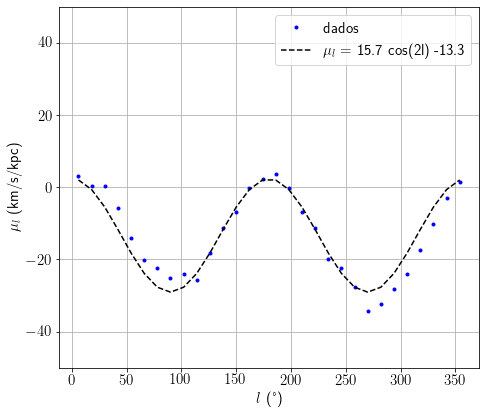

In [34]:
ls_rad = np.radians(ls)

def curva(ls_rad, A, B):
    return (A*np.cos(2*ls_rad) + B)

param, param_cov = curve_fit(curva, ls_rad, media_mi_corr)
  
print(f'coeficientes: {param}')
print(f'erro: {param_cov}')

A = param[0]
B = param[1]

fit = (A*np.cos(2*ls_rad) + B)

plt.figure(figsize=[7,6])
plt.plot(ls, media_mi_corr, '.', color ='blue', label='dados')
plt.plot(ls, fit, '--', color ='black', label =f'$\mu_l$ = {round(A,1)} cos(2l) {round(B,1)}')
plt.ylim(-40, 40)
plt.xlabel('$l$ (°)')
plt.ylabel('$\mu_l$ (km/s/kpc)')
plt.grid(True)
plt.legend()
plt.tight_layout()

vi

In [53]:
R0 = 8 #kpc
v_c = R0 * (A - B)
print(v_c) #km/s

232.5088808313222


In [54]:
G = 43007.1 #kpc (km/s)² (1e10 Msun)⁻¹
M_R0 = (v_c**2)*R0/G 
print(M_R0) #1e10 Msun

10.056084630757988
